# Project 2. Periodic Potentials in Quantum Mechanics
David Lapidus - s5860679

Ioan Leolea - s6039103

Karlis Driba - s6009611

Vainius Staškūnas - s5901154

## Abstract
Aim of the project is to look in details to behaviour of a system with a periodic potential in one dimension, e.g. mono-crystal structure as semiconductors, and a simple two-dimensional model for a trapped particle.

We will the natural units through this project.


In this project we will use time-independent Schrödinger equation: $$\frac{d^2\psi(x)}{dx^2} = -\frac{2m}{\hbar^2}(E-V(x))\psi(x).$$

## Libraries

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings
from scipy.integrate import IntegrationWarning

## Constants

In [4]:
V0 = 50    # Potential depth V_0
a = 1          # Well width a
R0 = 1         # Well radius R_0

## 1. Periodic Potential

### Finite-depth Well Potential
$$V(x)=\begin{cases} V_0, & |x|>a/2, \\ 0,  & |x|\leq a/2 \end{cases},$$
where $V_0 = 50$ is a depth of the potential and $a = 1$ - width of the well in natural units.

#### Energies and wave functions for bound states

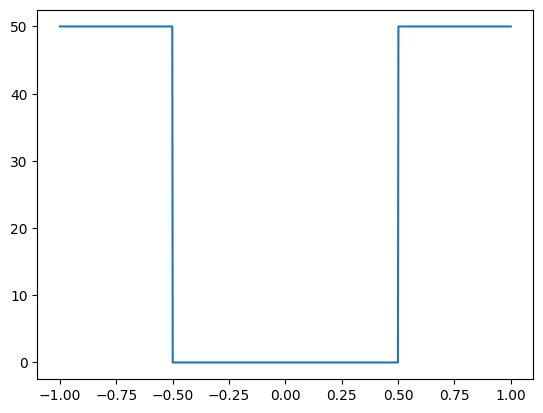

In [28]:
def potential_well(x):
    return np.where(np.abs(x) > a / 2, V0, 0)

figure, axis = plt.subplots(1, 1)
x = np.linspace(-a, a, 1000)
axis.plot(x, potential_well(x))
plt.show()


#### Probability outside the well for bound states

#### Estimation of precision of the results

#### Energy levels and probabilities using the matrix method

#### Estimation of precision of the results

### Finite-depth Potential with Two Wells
$$V(x)=\begin{cases} V_0, & |x|>a+d/2, \\ V_0,  & |x|<d/2, \\ 0, & \text{elsewhere} \end{cases},$$
where $V_0 = 50$ is a depth of the potential, $a = 1$ and $d$ - width of each well and the distance between them in natural units.

##### Analytic Solution

Allowed energies for even states: [1.6951587873565674, 10.766065614759297, 26.963048033581348, 47.5404191066773]
Allowed energies for odd states: [3.962703915978062, 15.244754739283277, 32.16910627853351, 48.902868608780004]
-1.582067810090848e-15
7.632783294297951e-16
9.992007221626409e-16
-1.283417816466681e-13


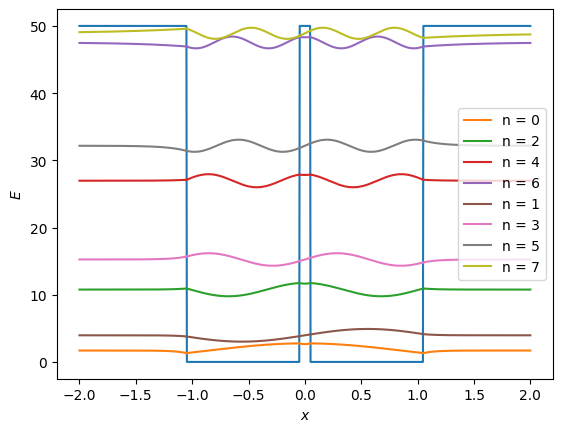

In [202]:
def potential_well_double(x, d):
    return np.where((np.abs(x) > a + d / 2) | (np.abs(x) < d / 2), V0, 0)

d = a * 0.1


k = lambda x: np.sqrt(2*x)
kappa = lambda x: np.sqrt(2*(V0-x))

e_even = lambda x: (k(x)*np.tan(k(x)*a) - kappa(x)*np.tanh(k(x)*d/2)) / (1 + kappa(x)/k(x)*np.tan(k(x)*a)*np.tanh(k(x)*d/2)) - kappa(x)
e_odd = lambda x: (1/k(x)*np.tan(k(x)*a) + 1/kappa(x)*np.tanh(k(x)*d/2)) / (1 - k(x)/kappa(x)*np.tan(k(x)*a)*np.tanh(k(x)*d/2)) + 1/kappa(x)

def find_allowed_energies(f, N=1000):
    xs = np.linspace(0, V0, N)
    roots = []
    for i in range(N - 1):
        f1, f2 = f(xs[i]), f(xs[i + 1])
        # strict sign change and finite values
        if np.isfinite(f1) and np.isfinite(f2) and f1 * f2 < 0:
            sol = sp.optimize.root_scalar(f, bracket=(xs[i], xs[i + 1]), method="brentq")
            if sol.converged:
                r = sol.root
                # verify root accuracy
                if abs(f(r)) < 1e-6:
                    if not any(abs(r - r2) < 1e-4 for r2 in roots):
                        roots.append(r)
    return roots

with np.errstate(divide='ignore', invalid='ignore'): allowed_energies_even = find_allowed_energies(e_even)
with np.errstate(divide='ignore', invalid='ignore'): allowed_energies_odd = find_allowed_energies(e_odd)
print(f"Allowed energies for even states: {allowed_energies_even}")
print(f"Allowed energies for odd states: {allowed_energies_odd}")

for r in allowed_energies_odd:
    print(e_odd(r))

#allowed_energies = [0.78957, 7.10612, 19.73921, 38.68583]

figure, axis = plt.subplots(1)
axis.set_xlabel("$x$")
axis.set_ylabel("$E$")
x = np.linspace(-a * 2, a * 2, 1000)
axis.plot(x, potential_well_double(x, d))

color_counter = 1

def plot_energies(is_even, allowed_energies):
    for i in range(len(allowed_energies)):
        E = allowed_energies[i]

        sign = (-1)**(int(is_even)+1)
        psi_0 = lambda x: np.cos(x) if is_even else np.sin(x)
        psi_1 = lambda x: np.sin(x) * sign

        b_inv = 1/kappa(E) * psi_0(k(E)*(a+d/2))**2 + 1/(2*k(E)) * (2*a*k(E) - psi_1(k(E)*d) + psi_1(2*k(E)*(a+d/2))) + 2*psi_0(k(E)*d/2)**2 * (np.sinh(kappa(E)*d)/kappa(E) + sign*d) / max(1e-6, (np.exp(kappa(E)*d/2) + sign*np.exp(-kappa(E)*d/2))**2)

        B = 1/np.sqrt(b_inv)
        A = B * psi_0(k(E)*(a+d/2)) * np.exp(kappa(E)*(a+d/2))
        C = B * psi_0(k(E)*d/2) / max(1e-6, (np.exp(kappa(E)*d/2) + sign*np.exp(-kappa(E)*d/2)))

        x1 = np.linspace(-a*2, -a-d/2, 1000)
        x2 = np.linspace(-a-d/2, -d/2, 1000)
        x3 = np.linspace(-d/2, d/2, 1000)
        x4 = np.linspace(d/2, a+d/2, 1000)
        x5 = np.linspace(a+d/2, a*2, 1000)

        color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i+color_counter]

        axis.plot(x1, E + sign*A*np.exp(kappa(E)*x1), color=color)
        axis.plot(x2, E + B*psi_0(k(E)*x2), color=color)
        axis.plot(x3, E + C*(np.exp(kappa(E)*x3) + sign*np.exp(-kappa(E)*x3)), color=color)
        axis.plot(x4, E + B*psi_0(k(E)*x4), color=color)
        axis.plot(x5, E + A*np.exp(-kappa(E)*x5), color=color, label=f"n = {2*i if is_even else 2*i+1}")


plot_energies(True, allowed_energies_even)
color_counter += len(allowed_energies_even)
plot_energies(False, allowed_energies_odd)
axis.legend()
plt.show()


#### Energies and wave functions for bound states

The goal is to solve the time-independent Schrödinger equation $$\hat{H}\psi=E\psi$$ for bound states ($E<V_0$) and find the unknown eigenenergies $E$ and eigenfunctions $\psi$. For this, we use the matrix method.

For the orthonormal basis we use the eigenfunctions of an infinite square well, centered at $x=0$: $$\phi_n=\sqrt{\frac{2}{b}}\sin\left(\frac{n\pi (x+b/2)}{b}\right),$$ so that we can write the eigenfunctions for our problem as a linear combination of basis functions: $$\psi=\sum_{n=1}^\infty c_n\phi_n(x)$$

We represent the Hamiltonian as an $n\times n$ matrix, where each entry is given by $$H_{mn}=E_n\delta_{mn}+\int_{-b/2}^{b/2}\phi_m^*(x)V(x)\phi_n^*(x)dx, $$ where $E_n=\frac{n^2\pi^2}{2b^2}$ is an eigenenergy of an infinite square well.

We then diagonalize this matrix to find its eigenvalues, which are going to be the eigenenergies for our problem, and the corresponding eigenvectors, which are going to form the eigenfunctions for our problem.

d = 0.0
P         E_1         E_2         E_3         E_4         E_5         E_6         E_7         
---------------------------------------------------------------------------------------
P_left    0.250000    0.250000    0.250000    0.250000    0.250000    0.250000    0.250000    
P_right   0.250000    0.250000    0.250000    0.250000    0.250000    0.250000    0.250000    

d = 0.1
P         E_1         E_2         E_3         E_4         E_5         E_6         E_7         
---------------------------------------------------------------------------------------
P_left    0.250000    0.250000    0.250000    0.250000    0.250000    0.250000    0.249997    
P_right   0.250000    0.250000    0.250000    0.250000    0.250000    0.250000    0.249997    

d = 0.2
P         E_1         E_2         E_3         E_4         E_5         E_6         E_7         
---------------------------------------------------------------------------------------
P_left    0.250000    0.250000    0.250000   

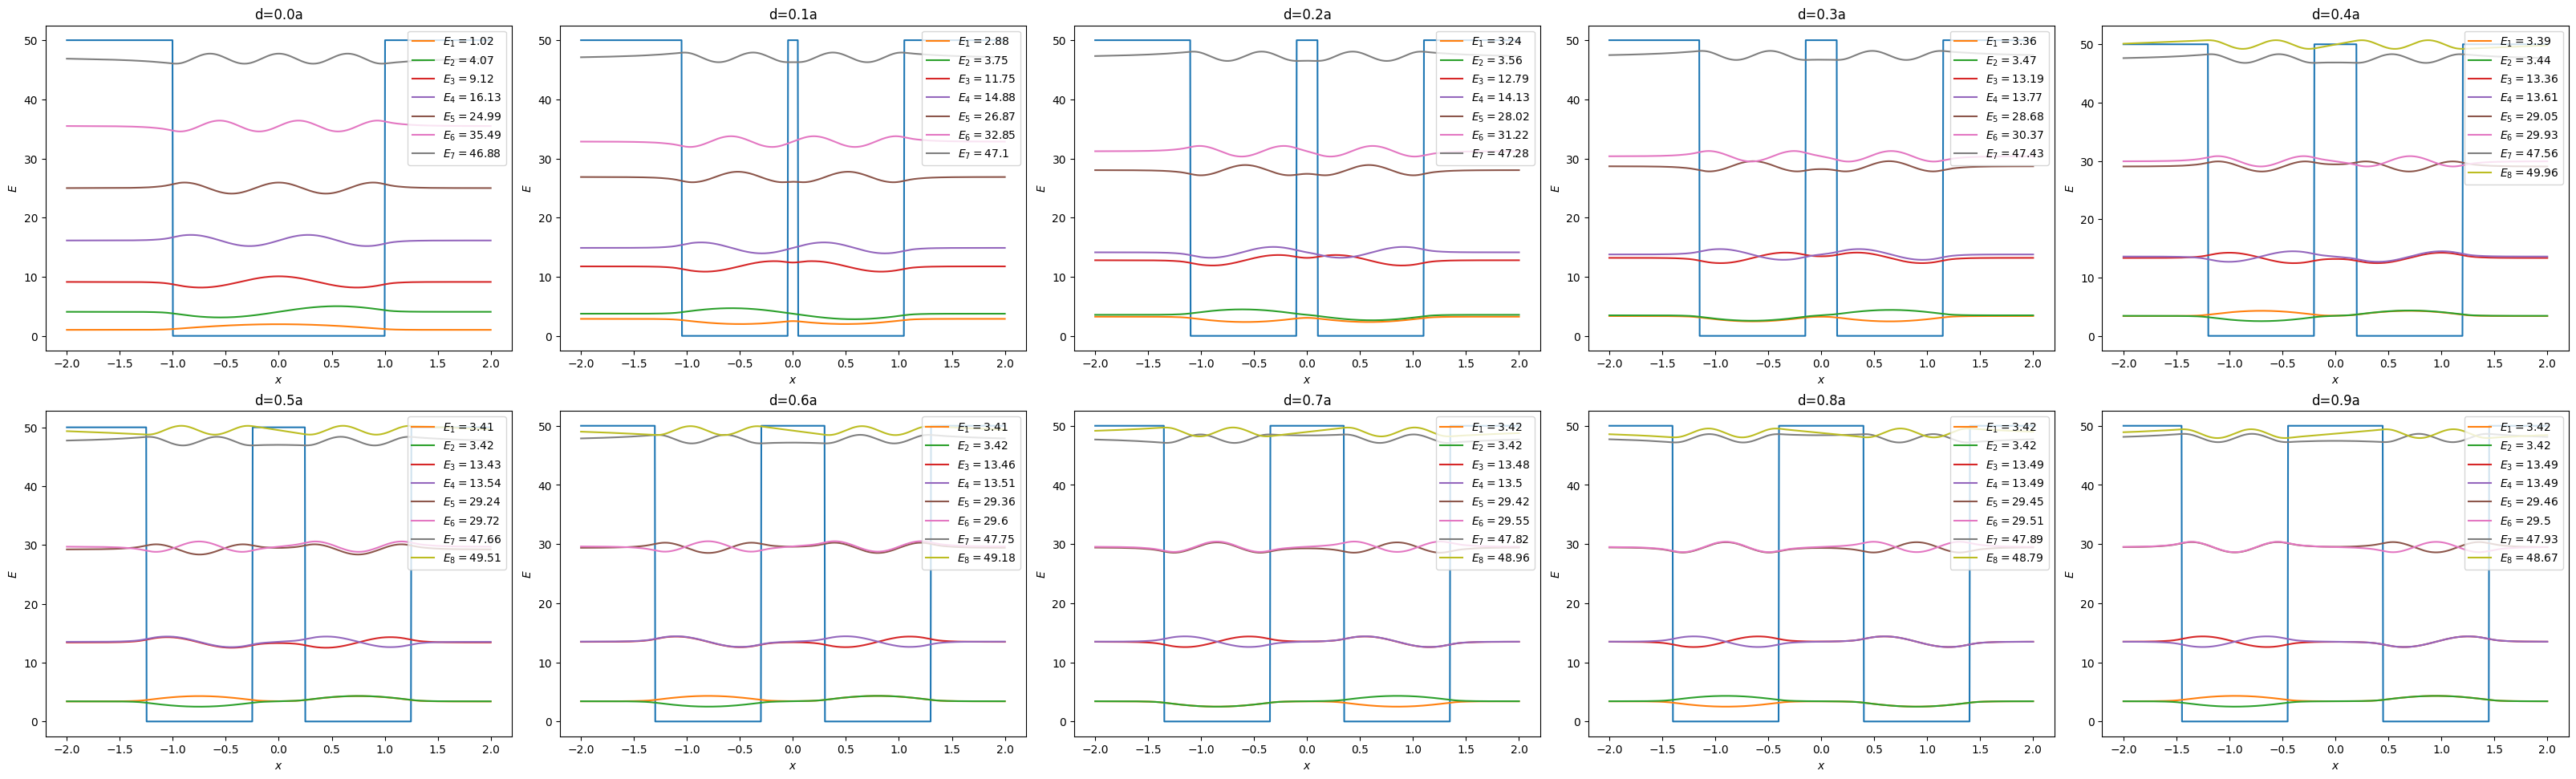

In [97]:
def double_well_potential(x, a, d, V0):
    return np.where((np.abs(x) > a + d / 2) | (np.abs(x) < d / 2), V0, 0)

def basis_function(b, n, x):
    return np.sqrt(2/b) * np.sin(n*np.pi*(x+b/2)/b)

def matrix_method_solver_double_well(a, d, V0, n_max=50):
    b = 4*a + d

    delta = lambda m, n: int(m == n)

    H0 = lambda m, n: 0.5*(n*np.pi/b)**2 * delta(m, n)
    V = lambda m, n: sp.integrate.quad(lambda x: basis_function(b, m, x) * double_well_potential(x, a, d, V0) * basis_function(b, n, x), -b / 2, b / 2)[0]
    H_mn = lambda m, n: H0(m, n) + V(m, n)

    H = np.zeros((n_max, n_max))

    for i in range(n_max):
        for j in range(n_max):
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", IntegrationWarning)
                H[i, j] = H_mn(i+1, j+1)

    H = np.array(H)

    eigenvalues, eigenvectors = np.linalg.eigh(H)
    eigenenergies = eigenvalues[eigenvalues < V0]
    wavefunctions = eigenvectors[:, eigenvalues < V0]

    return eigenenergies, wavefunctions

def plot_wave_functions_finite_double_well(a, V0, d=None):
    if d is None:
        d = [a * i / 10 for i in range(0, 10)]

    grid_rows = int((len(d) - 1) // 5) + 1
    grid_cols = 5
    figure, axis = plt.subplots(grid_rows, grid_cols, figsize=(6.4*grid_cols, 4.8*grid_rows), constrained_layout=True)
    x = np.linspace(-a * 2, a * 2, 1000)

    for g_x in range(grid_rows):
        for g_y in range(grid_cols):
            d_index = g_x * grid_cols + g_y
            d_i = d[d_index]

            axis[g_x, g_y].set_title(f'd={d_i}a')
            axis[g_x, g_y].set_xlabel('$x$')
            axis[g_x, g_y].set_ylabel('$E$')
            axis[g_x, g_y].plot(x, double_well_potential(x, a, d_i, V0))

            b = 4*a + d_i

            eigenenergies, wavefunctions = matrix_method_solver_double_well(a, d_i, V0)
            probabilities = []

            for i in range(len(eigenenergies)):
                psi = np.zeros_like(x)

                for n, c in enumerate(wavefunctions[:, i]):
                    psi += c * basis_function(b, n + 1, x)

                probability_left = np.trapezoid(psi*psi, np.linspace(-a-d_i/2, -d_i/2, 1000))
                probability_right = np.trapezoid(psi*psi, np.linspace(d_i/2, a+d_i/2, 1000))
                probabilities.append((probability_left, probability_right))

                eigenenergy = eigenenergies[i]
                axis[g_x, g_y].plot(x, eigenenergy + psi, label=f'$E_{i+1}={round(eigenenergy, 2)}$')
                axis[g_x, g_y].legend(loc='upper right')

            # Header: energy levels
            print(f'd = {d_i}')
            print(f'{"P":<10}', end='')
            for j in range(len(eigenenergies)):
                print(f'E_{j+1:<10}', end='')
            print()

            # Separator
            print('-' * (10 + 11 * len(eigenenergies)))

            # P_left row
            print(f'{'P_left':<{10}}', end='')
            for i in range(len(probabilities)):
                print(f'{probabilities[i][0]:<12.6f}', end='')
            print()

            # P_right row
            print(f'{'P_right':<{10}}', end='')
            for i in range(len(probabilities)):
                print(f'{probabilities[i][1]:<12.6f}', end='')
            print('\n')

    plt.show()

plot_wave_functions_finite_double_well(a, V0)


The graphs above illustrate the behaviour of a double-well potential for varying values of the distance between the two wells $d$, ranging from $0$ to $0.9a$ in increments of $0.1a$. For the case $d=0$, the double well effectively reduces to a single well of double width ($a=2$), and the corresponding eigenenergy spectrum coincides with that of a single finite well of width $2a$.

As the separation $d$ increases, the eigenenergies of the system show only minor variations. In particular, beyond $d=0.5a$, the energy levels become almost indistinguishable form one another, indicating that further increasing the distance between the wells has very little effect of the spectrum. Interestingly, for $d\geq0.4a$, an additional 8th bound-state energy appears.

Analysis of the corresponding wavefunctions shows that for all tested configurations the probability of finding the particle in the left well is equal to that in the right well. This indicates that there is no preferable well in which the particle tends to localize, and the system remains symmetric in terms of probability distribution.

Furthermore, the eigenenergies exhibit a tendency to cluster into four distinct groups or formation zones, where several energy levels are closely spaced, separated by larger gaps between the zones. Within each formation zone, the energy levels are nearly degenerate, and the probability distributions of symmetric and antisymmetric states are identical. With increasing $d$, these formation zones become more clearly defined and easily distinguishable.

Overall, these results demonstrate that while the separation between the wells can slightly modify the higher bound-state energies, the double-well system preserves it symmetry, and no single well is favoured in terms of particle localization.



#### Bound-state energies and eigenfunctions for a four-well rectangular potential energy function

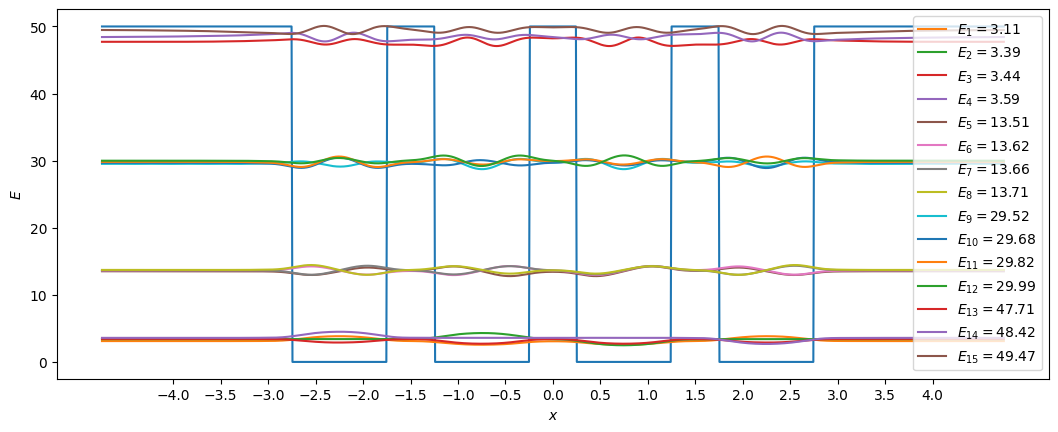

In [5]:
def multi_well_potential(x, a, d, n, V0):
    """Generalized method for arbitrary number of wells"""

    p = a + d
    shift = p/2 * int(n % 2 == 1)

    l_half = (n*a + (n-1)*d) / 2.0
    y = (np.abs(x) + d/2.0 + shift) % p

    barrier_inside = y < d
    outside = np.abs(x) > l_half

    is_barrier = barrier_inside | outside
    return np.where(is_barrier, V0, 0)

def basis_function(b, n, x):
    return np.sqrt(2/b) * np.sin(n*np.pi*(x+b/2)/b)

def matrix_method_solver(a, d, N, V0, n_max=50):
    b = 2*N*a + (N-1)*d

    delta = lambda m, n: int(m == n)

    H0 = lambda m, n: 0.5*(n*np.pi/b)**2 * delta(m, n)
    V = lambda m, n: sp.integrate.quad(lambda x: basis_function(b, m, x) * multi_well_potential(x, a, d, N, V0) * basis_function(b, n, x), -b/2, b/2)[0]
    H_mn = lambda m, n: H0(m, n) + V(m, n)

    H = np.zeros((n_max, n_max))

    for i in range(n_max):
        for j in range(n_max):
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", IntegrationWarning)
                H[i, j] = H_mn(i+1, j+1)

    H = np.array(H)

    eigenvalues, eigenvectors = np.linalg.eigh(H)
    eigenenergies = eigenvalues[eigenvalues < V0]
    wavefunctions = eigenvectors[:, eigenvalues < V0]

    return eigenenergies, wavefunctions

def plot_multi_well_eigenfunctions(a, d, n, V0):
    eigenenergies, wavefunctions = matrix_method_solver(a, d, n, V0)
    b = 2*n*a + (n-1)*d

    figure, axis = plt.subplots(1, figsize=(6.4*2, 4.8))
    x = np.linspace(-b/2, b/2, 1000)
    axis.plot(x, multi_well_potential(x, a, d, n, V0))
    axis.set_xlabel('$x$')
    axis.set_ylabel('$E$')

    for i in range(len(eigenenergies)):
        psi = np.zeros_like(x)

        for j, c in enumerate(wavefunctions[:, i]):
            psi += c * basis_function(b, j + 1, x)

        eigenenergy = eigenenergies[i]
        axis.plot(x, eigenenergy + psi, label=f'$E_{{{i+1}}} = {round(eigenenergy, 2)}$')
        axis.legend(loc='upper right')
        axis.set_xticks(np.arange(-np.floor(b/2), np.floor(b/2)+0.5, 0.5))
    plt.show()

d = 0.5
plot_multi_well_eigenfunctions(a, d, 4, V0)

The matrix diagonalization method was applied to a four-well rectangular potential with each well having a width $a=1$, separated by barriers of width $d=0.5$ and height $V_0=50$ (in natural units).

As expected, the energy spectrum exhibits formation zones, with the 15 bound-state energies grouping into 4 distinct clusters. Each formation zone originates from the energy levels of an isolated single well. If the wells were infinitely far apart, each well would have the same set of discrete bound-state energies, and these would be exactly degenerate across the four wells.

Because the wells are at a finite distance apart, the wavefunctions in neighbouring wells overlap, allowing quantum tunneling between wells. This tunneling causes each originally degenerate energy level to split into several closely spaced levels, forming a cluster.

Within a formation zone, the energy levels are closely spaced, while the energy gaps between different zones remain larger, since the tunneling has a much smaller effect on the separation between higher and lower single-well levels.

The more well there are, the more levels appear in each formation zone. As the number of wells increases, the formation zones become more pronounced and easier to distinguish.

## 2. Two-dimensional Case
$$V(r, \phi)=\begin{cases} V_0r^2, & r<R_0, \\ V_0,  & r>R_0\end{cases},$$
where $V_0 = 50$ is the barrier height and $R_0 = 1$ is the radius of a well in natural units

 ### Lowest energy-levels

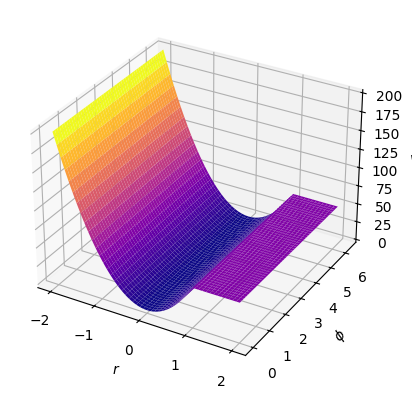

In [46]:
def potential_well_2d(r, phi):
    return np.where(r < R0, V0 * r ** 2, V0)

r = np.linspace(-R0 * 2, R0 * 2, 1000)
phi = np.linspace(0, 2*np.pi, 1000)

R, PHI = np.meshgrid(r, phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(R, PHI, potential_well_2d(R, PHI), cmap='plasma')

ax.set_xlabel('$r$')
ax.set_ylabel('$\\phi$')
ax.set_zlabel('$V$')

plt.show()

### Degenerate levels